<a href="https://colab.research.google.com/github/FatiBuuloloo/loan_approval_classifier-mini_project_002/blob/main/loan_approval_classifier_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 002

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
data =pd.read_csv("/content/loan_data.csv")

In [3]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [4]:
data.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [5]:
data.shape

(45000, 14)

In [6]:
data.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [7]:
data.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


In [8]:
cols_to_rename ={
"person_emp_exp":"work_experience",
"loan_percent_income":"loan_income_ratio",
"cb_person_cred_hist_length":"credit_age",
"previous_loan_defaults_on_file":"previous_loan_defaults"
}
data.rename(columns=cols_to_rename,inplace=True)

In [9]:
data["loan_intent"] = np.where(data["loan_intent"]=="DEBTCONSOLIDATION", "DEBT CONSOLIDATION", np.where(data["loan_intent"]=="HOMEIMPROVEMENT", "HOME IMPROVEMENT", data["loan_intent"]))

In [10]:
status1=data[data["loan_status"]==1]["loan_income_ratio"]
status0=data[data["loan_status"]==0]["loan_income_ratio"]

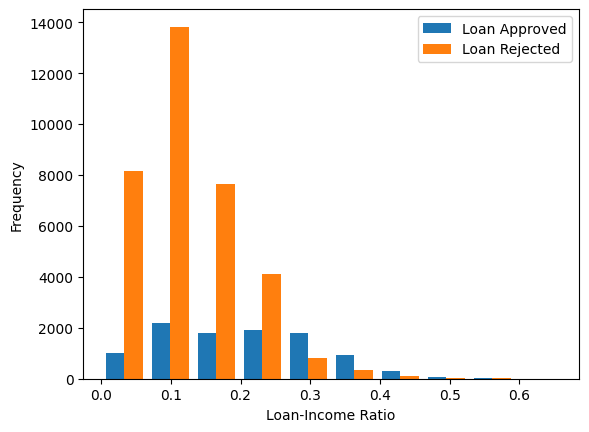

In [11]:
plt.hist([status1,status0],
label=["Loan Approved","Loan Rejected"])
plt.xlabel("Loan-Income Ratio")
plt.ylabel("Frequency")
plt.legend()
plt.show()

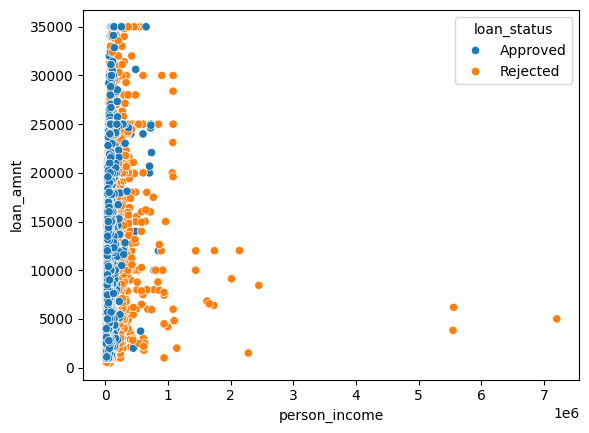

In [12]:

loan_labels={0:"Rejected",1:"Approved"}
sns.scatterplot(data=data,
x="person_income",
y="loan_amnt",
hue=data["loan_status"].map(loan_labels)
)
plt.show()

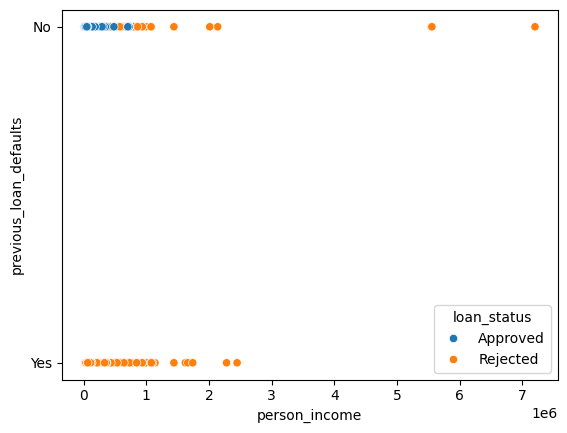

In [13]:
sns.scatterplot(data=data,
x="person_income",
y="previous_loan_defaults",
hue=data["loan_status"].map(loan_labels)
)
plt.show()

In [14]:
print("As observed in the data(Income vs Loan Amount Graphic), \n several individuals with high incomes were rejected for a loan due to their history of previous defaults.\n This is clearly illustrated in the Income vs. Loan Amount visualization,\n where loan rejections are strongly associated with a failure to repay prior debts rather than income level alone")

As observed in the data(Income vs Loan Amount Graphic), 
 several individuals with high incomes were rejected for a loan due to their history of previous defaults.
 This is clearly illustrated in the Income vs. Loan Amount visualization,
 where loan rejections are strongly associated with a failure to repay prior debts rather than income level alone


In [15]:
le_education=LabelEncoder()
le_home=LabelEncoder()
le_intent=LabelEncoder()
data["person_education"]=le_education.fit_transform(data["person_education"])
data["person_gender"] = np.where(data["person_gender"]=="female",1,0)
data["person_home_ownership"]=le_home.fit_transform(data["person_home_ownership"])
data["loan_intent"] = le_intent.fit_transform(data["loan_intent"])
data["previous_loan_defaults"] = np.where(data["previous_loan_defaults"]=="Yes",1,0)

In [16]:
print(le_intent.classes_)

['DEBT CONSOLIDATION' 'EDUCATION' 'HOME IMPROVEMENT' 'MEDICAL' 'PERSONAL'
 'VENTURE']


In [17]:
data.dtypes

,0
person_age,float64
person_gender,int64
person_education,int64
person_income,float64
work_experience,int64
person_home_ownership,int64
loan_amnt,float64
loan_intent,int64
loan_int_rate,float64
loan_income_ratio,float64


In [18]:
loan_approved=data[data["loan_status"]==1]
loan_rejected=data[data["loan_status"]==0]
print(f"Approved status have {len(loan_approved)} data\nRejected have {len(loan_rejected)} data")

Approved status have 10000 data
Rejected have 35000 data


In [19]:
data.head(5)

,person_age,person_gender,person_education,person_income,work_experience,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_income_ratio,credit_age,credit_score,previous_loan_defaults,loan_status
0,22.0,1,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,1,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,1,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,1,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,0,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [20]:
df_X = data.drop(columns=["loan_status"])
df_y = data["loan_status"]

In [21]:
train1_X,test1_X,train_y,test1_y = train_test_split(df_X,df_y,test_size=0.3, shuffle=True,random_state=24,stratify=df_y)
val1_X,testX,val1_y,test_y = train_test_split(test1_X,test1_y,test_size=0.2, shuffle=True,random_state=24,stratify=test1_y)

In [22]:
scaler=StandardScaler()
train_X = scaler.fit_transform(train1_X)
val_X = scaler.transform(val1_X)
test_X = scaler.transform(testX)

In [23]:
smote=SMOTE(
sampling_strategy="auto",
random_state=24,
k_neighbors=5
)
trainX_smote,trainy_smote=smote.fit_resample(train_X,train_y)

In [24]:
model = keras.Sequential([
keras.layers.Dense(128, input_shape=(trainX_smote.shape[1],),activation="tanh"),
keras.layers.Dropout(0.3),
keras.layers.Dense(100, activation="tanh"),
keras.layers.Dropout(0.2),
keras.layers.Dense(64, activation="tanh"),
keras.layers.Dropout(0.1),
keras.layers.Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

In [26]:
earlystop=EarlyStopping(monitor="val_loss", patience=10)

In [27]:
weight_class={0:3,1:1}
model.fit(trainX_smote,trainy_smote,
epochs=100,class_weight=weight_class,
callbacks=earlystop
)

Epoch 1/100
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8280 - loss: 0.5879
Epoch 2/100
  61/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8493 - loss: 0.4695

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8466 - loss: 0.4785
Epoch 3/100
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8531 - loss: 0.4513
Epoch 4/100
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8575 - loss: 0.4328
Epoch 5/100
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8643 - loss: 0.4176
Epoch 6/100
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8642 - loss: 0.4145
Epoch 7/100
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8615 - loss: 0.4151
Epoch 8/100
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8643 - loss: 0.4126
Epoch 9/100
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8664 - loss: 0.4093
Epoch 10/100
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8660 - loss: 0.4060
Epoch 11/100
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8710 - loss: 0.3991
Epoch 12/100
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8659 - loss: 0.4009
Epoch 13/100
1532/1532 ━━━━━━━

In [28]:
def score1(true, predict):
    print(f"Accuracy Score: {accuracy_score(true, predict)}")
    print(f"AUC Score: {roc_auc_score(true, predict)}")
    print(classification_report(true, predict))
    print()

In [29]:
prediction=model.predict(test_X)
prediction1 = np.where (prediction.flatten()>=0.5,1,0)
score1(test_y,prediction1)

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy Score: 0.92
AUC Score: 0.8658333333333333
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2100
           1       0.86      0.77      0.81       600

    accuracy                           0.92      2700
   macro avg       0.90      0.87      0.88      2700
weighted avg       0.92      0.92      0.92      2700




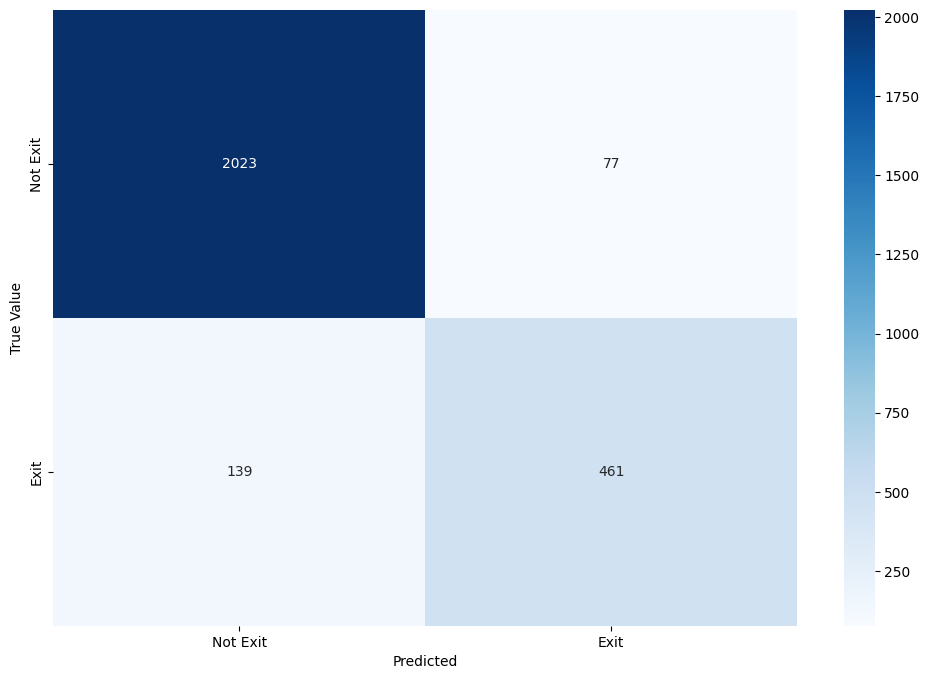

In [30]:
label=["Not Exit", "Exit"]
cm_model = confusion_matrix(test_y, prediction1)
plt.figure(figsize=(12,8))
sns.heatmap(cm_model, annot=True, fmt='d', cmap='Blues',
  xticklabels = label,
yticklabels = label)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

In [31]:
def run_prediction():
    age = input("Age: ")

    gender = input("Gender (Male/Female): ")
    if gender.lower() == "male":
        gender = 0
    elif gender.lower() == "female":
        gender = 1
    else:
        print("Error: Invalid gender. Please enter 'Male' or 'Female'.")
        return

    education = input("Highest Education Level[Associate, Bachelor, Doctorate, High School, Master]: ")
    edu_list=le_education.classes_
    if education.title() in edu_list:
        encoded_edu = le_education.transform([education.title()])[0]
    else:
        print(f"Error: '{education}' is not a valid category.")
        print(f"Valid options are: {list(le_education.classes_)}")
        return

    income = input("Annual Income: ")
    experience = input("Years of Work Experience: ")

    house = input("Home Ownership Status (Rent/Own/Mortgage/Other): ")
    if house.upper() in le_home.classes_:
        encoded_house = le_home.transform([house.upper()])[0]
    else:
        print(f"Error: '{house}' is not a valid category.")
        return

    loan_amnt = input("Loan Amount Requested: ")

    loan_intent = input("Enter loan purpose (Debt Consolidation, Education, Home Improvement, Medical, Personal, or Venture): ")
    if loan_intent.upper() in le_intent.classes_:
        encoded_intent = le_intent.transform([loan_intent.upper()])[0]
    else:
        print(f"Error: '{loan_intent}' is not a valid category.")
        return

    rate = input("Offered Interest Rate (%): ")
    credit_age = input("Credit History Length (Years): ")
    credit_score = input("Current Credit Score: ")

    loan_before = input("Previous Loan History (Y/N): ")
    if loan_before.lower() == "y":
        loan_before = 1
    elif loan_before.lower() == "n":
        loan_before = 0
    else:
        print("Error: Invalid input. Please enter 'Y' or 'N'.")
        return

    loan_income_rate = float(loan_amnt) / float(income)

    input_data = [[
        int(age),
        gender,
        encoded_edu,
        float(income),
        int(experience),
        encoded_house,
        int(loan_amnt),
        encoded_intent,
        float(rate),
        loan_income_rate,
        int(credit_age),
        int(credit_score),
        loan_before
    ]]

    input_df = pd.DataFrame(input_data, columns=df_X.columns)
    input_scaled = scaler.transform(input_df)

    model_prediction = model.predict(input_scaled)

    if model_prediction > 0.5:
        print("Loan Approved")
    else:
        print("Loan Rejected")

In [32]:
run_prediction()

Age: 26
Gender (Male/Female): male
Highest Education Level[Associate, Bachelor, Doctorate, High School, Master]: bachelor
Annual Income: 50000
Years of Work Experience: 10
Home Ownership Status (Rent/Own/Mortgage/Other): own
Loan Amount Requested: 100000
Enter loan purpose (Debt Consolidation, Education, Home Improvement, Medical, Personal, or Venture): home improvement
Offered Interest Rate (%): 6.5
Credit History Length (Years): 10
Current Credit Score: 650
Previous Loan History (Y/N): n
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Loan Approved


In [39]:
#model.save("model_mlp_project002.keras")
#model.export("model_mlp_project002")

In [38]:
#import shutil
#shutil.make_archive('model_mlp_project002', 'zip', 'model_mlp_project002')
#print("Folder berhasil di-zip!")

In [37]:
#import joblib

#joblib.dump(le_education, 'label_encoder_education.pkl')
#joblib.dump(le_home, 'label_encoder_home.pkl')
#joblib.dump(le_intent, 'label_encoder_intent.pkl')
#joblib.dump(scaler, 'scaler.pkl')